# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
os.listdir()

['GuidedCapstoneStep3-AnswerKey.ipynb',
 'GuidedCapstoneStep4-AnswerKey.ipynb',
 'Untitled.ipynb',
 'GuidedCapstoneStep5-AnswerKey.ipynb',
 'GuidedCapstoneStep2-AnswerKey.ipynb',
 'AnnotatedBoxplot.png',
 'GuidedCapstoneStep5.ipynb',
 'GuidedCapstoneStep3.ipynb',
 '.ipynb_checkpoints',
 'GuidedCapstoneStep6.ipynb',
 'GuidedCapstoneStep4.ipynb',
 'GuidedCapstoneStep6-AnswerKey.ipynb',
 'GuidedCapstoneStep2.ipynb']

In [2]:
#change directory to data
path="/Users/justin/Desktop/GuidedCapstone-master-2/data/data"
os.chdir(path)

In [3]:
#load in the file
file="step3_output.csv"
df=pd.read_csv(file)
df.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,2,0,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1
3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,0
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,0


## Fit Models with Training Data Set

**<font color='teal'> Using sklearn fit the model you cose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [4]:
#Lets Change the way we encode here and scale so we can prevent data leakage

#Introduce Column Transformer here
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

ohe = OneHotEncoder(handle_unknown='ignore') #if test set has less features 
scaler = preprocessing.StandardScaler()

X=df.drop(['AdultWeekend','Name','state'], axis=1)
y=df.AdultWeekend
y=y.ravel()

#column transformer 
ct = make_column_transformer(
    (ohe,['clusters']), #encode state 
    (scaler, ['summit_elev', 'vertical_drop', 'trams', 'fastEight',
       'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface',
       'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'projectedDaysOpen',
       'NightSkiing_ac']), #scale
    remainder='passthrough') #passthrough

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [7]:
#all first model set
#Should really use column transformer here like this 
from sklearn.pipeline import make_pipeline
from sklearn import linear_model

lm = linear_model.LinearRegression()
pipe = make_pipeline(ct, lm)

In [8]:
pipe.fit(X_train,y_train);

In [9]:
y_pred = pipe.predict(X_test)

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [10]:
df[df['Name'].str.contains('Big Mountain')]

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,Big Mountain Resort,Montana,6817,2353,0,0.0,0,3,2,6,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,2


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [16]:
blueMountain = df[df['Name'].str.contains('Big Mountain')]
blueMountain = blueMountain.drop(columns = ['state','Name'])

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [40]:
print ("The predicted Big Mountain Resort adult weekend price is $%s " % ' '.join(map(str, pipe.predict(blueMountain))))

The predicted Big Mountain Resort adult weekend price is $88.42942828879822 


/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [39]:
print ("The actual Big Mountain Resort adult weekend price is $%s " % ' '.join(map(str, blueMountain['AdultWeekend'])))

The actual Big Mountain Resort adult weekend price is $81.0 


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

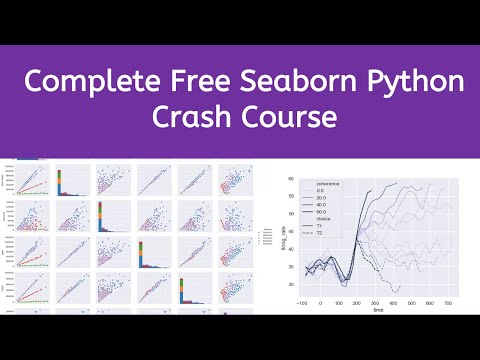

In [56]:
#Maybe put a video tutorial here 
from IPython.display import YouTubeVideo

YouTubeVideo('GcXcSZ0gQps')

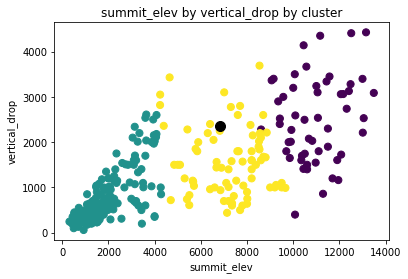

In [42]:
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(blueMountain['summit_elev'], blueMountain['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('fig1.png',bbox_inches='tight')

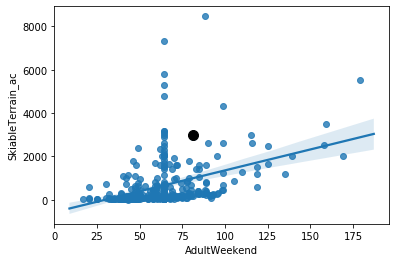

In [44]:
#https://seaborn.pydata.org/generated/seaborn.regplot.html
sns.regplot(x="AdultWeekend", y="SkiableTerrain_ac", data=df[(df['SkiableTerrain_ac']<25000)])
plt.scatter(x="AdultWeekend", y="SkiableTerrain_ac", data=blueMountain, c='black',s=100)
plt.savefig('fig2.png',bbox_inches='tight')

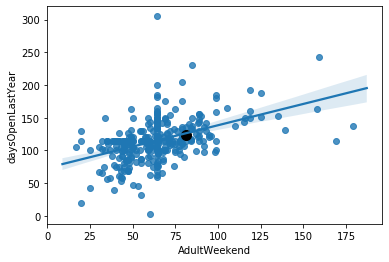

In [45]:
sns.regplot(x="AdultWeekend", y="daysOpenLastYear", data=df)
plt.scatter(x="AdultWeekend", y="daysOpenLastYear", data=blueMountain, c='black',s=100)
plt.savefig('fig3.png',bbox_inches='tight')

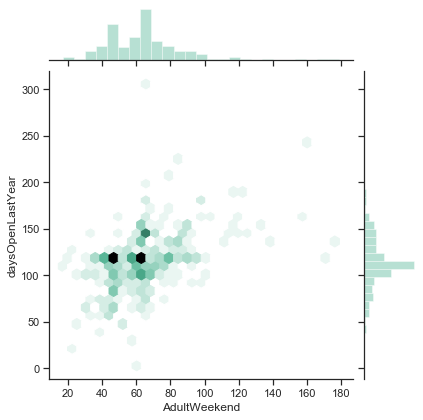

In [47]:
#https://seaborn.pydata.org/generated/seaborn.jointplot.html
sns.set(style="ticks")
sns.jointplot(x=df['AdultWeekend'], y=df['daysOpenLastYear'], kind="hex", color="#4CB391")
plt.savefig('fig4.png',bbox_inches='tight')

## Present and share your findings - storytelling

- Identify audience
- Build narrative
- Communicate recommendations

When developing your data story, you need to first identify your audience and then structure your presentation accordingly. There are generally three types of audiences you will face as a data scientist.  
1. Executives - the decision makers
2. Technical - colleagues and managers
3. Non-Technical   

The focus for this presentation is the management of Big Mountian Resort. Therefore we will take the approach for an executive presentation. You will learn more about the different types of audiences and how to present information to a particular audience type in the storytelling unit. For an executive tyoe of presentation you need start with the recommendation first and follow with details on how you arrived at that recommendation in later slides. This is different than a project walkthrough presentaiton where you would dicsuss the steps in your analysis in a more linear narrative.
 
Occasionally, you may be faced with presenting to a mixed audience, in which case do your best to bridge the interests of everyone together without going too deep into the technical details.


**<font color='teal'> Using the three to four figures you created in the previous step develop a short slide deck or powerpoint presentation demonstrating the findings and recommendations to the management at Big Mountain Resort. Upload this presentation to your project Github repo as a pdf. </font>** 

**<font color='teal'> Again, using the three to four figures you created in the previous step develop 1-2 page project report, where you discuss the recommendations. Upload this report to your project Github repo as pdf or Google doc. </font>** 

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and python scripts you have created and clean them n=up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model out a callable object using pickle for future use in a data pipeline.**<font color='teal'> Run the example code below to save out your callable model, notice we save it in the models folder we created in our previous guided capstone.</font>** 

In [49]:
#import pickle
#s = pickle.dumps(model)
from joblib import dump, load
dump(pipe, 'regression_model_adultweekend.joblib') 

['regression_model_adultweekend.joblib']

## Finalize Documentation

In [52]:
l = pipe.named_steps['columntransformer'].transformers_[0][1].categories_
column_names = ['summit_elev', 'vertical_drop', 'trams', 'fastEight',
       'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface',
       'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'projectedDaysOpen',
       'NightSkiing_ac'] + list(l[0])

For model documentation we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file then upload it to your github repository.</font>** 

In [54]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

coeff_df = pd.DataFrame(abs(pipe.named_steps['linearregression'].coef_), 
                        column_names, columns=['Coefficient'])  
coeff_df['MAE'] = mean_absolute_error(y_test, y_pred)
coeff_df['ExpVar'] = explained_variance_score(y_test, y_pred)
coeff_df.to_csv('model_metrics.csv',index=False)

In [55]:
coeff_df

,Coefficient,MAE,ExpVar
summit_elev,0.358325,5.211951,0.931779
vertical_drop,1.323196,5.211951,0.931779
trams,1.681521,5.211951,0.931779
fastEight,0.233251,5.211951,0.931779
fastSixes,1.863121,5.211951,0.931779
fastQuads,0.306969,5.211951,0.931779
quad,0.084066,5.211951,0.931779
triple,0.410814,5.211951,0.931779
double,0.603276,5.211951,0.931779
surface,1.460822,5.211951,0.931779
